# 9.4 Recurrent Neural Network

If we want to take account all the previous values unlike $n$-grams, it is preferable to use a latent variable model to reduce the memory consumption:

$$
P(x_t|x_{t-1}, ..., x_1) \simeq P(x_t|h_{t-1})
$$

where $h_{t-1}$ is a hidden state that stores the sequence information up to time step $t-1$. In general, the hidden state at any time step $t$ could be computed based on the current input $x_t$ and the previous hidden state $h_{t-1}$:

$$
h_t = f(x_t, h_{t-1})
$$

Recurrent neural networks (RNNs) are neural networks with hidden states. Before introducing the RNN model, we first revisit the MLP model introduced in Section 5.1.

In [2]:
import torch
from d2l import torch as d2l

## 9.4.1 Neural Networks without Hidden States 

Let's take a look at an MLP with a single hidden layer. Let the hidden layer's activation function be $\phi$. Given a minibatch of examples $\mathbf{X} \in \mathbb{R}^{n \times d}$ with batch size $n$ and $d$ inputs, the hidden layer output $\mathbf{H} \in \mathbb{R}^{n \times h}$ is calculated as

$$
\mathbf{H} = \phi(\mathbf{X}\mathbf{W}_{Xh} + \mathbf{b}_h)
$$

Next, the hidden layer output $\mathbf{H}$ is used as input of the output layer, which is given by

$$
\mathbf{O} = \mathbf{H}\mathbf{{W}_{hq}} + \mathbf{b}_q
$$

If it is a classification problem, we can use $softmax(\mathbf{O})$ to compute the probability distribution of the output categories.

## 9.4.2 Recurrent Neural Networks with Hidden States

Matters are entirely different when we have hidden states. The calculation of the hidden layer output of the current time step is determined by the input of the current time step together with the hidden layer output of the previous time step:

$$
\mathbf{H_t} = \phi(\mathbf{X}_t \mathbf{W}_{xh} + \mathbf{H}_{t-1}\mathbf{W}_{hh} + \mathbf{b}_h)
$$

For time step $t$, the output of the output layer is similar to the computation in the MLP:

$$
\mathbf{O}_t = \mathbf{H}_t \mathbf{W}_{hq} + \mathbf{b}_q
$$

The below figure illustrates the computational logic of an RNN at three adjacent time steps.

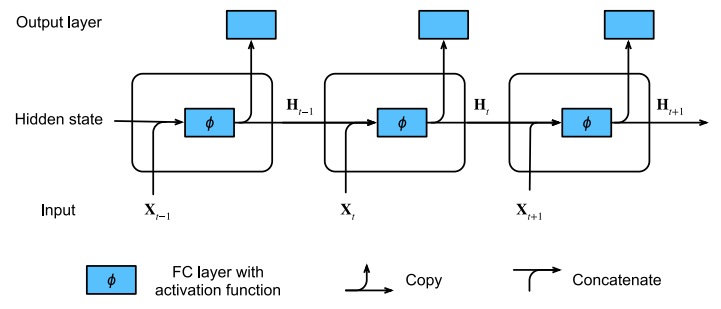

In [3]:
X, W_xh = torch.randn(3, 1), torch.randn(1, 4)
H, W_hh = torch.randn(3, 4), torch.randn(4, 4)
torch.matmul(X, W_xh) + torch.matmul(H, W_hh)

tensor([[-1.4572,  0.1878,  3.1442, -1.4885],
        [ 1.2907,  1.1933,  0.4558,  1.3143],
        [-0.9289, -2.5345,  0.0495, -1.4483]])

In [4]:
torch.matmul(torch.cat((X, H), 1), torch.cat((W_xh, W_hh), 0))

tensor([[-1.4572,  0.1878,  3.1442, -1.4885],
        [ 1.2907,  1.1933,  0.4558,  1.3143],
        [-0.9289, -2.5345,  0.0495, -1.4483]])

## 9.4.3 RNN-Based Character-Level Language Models

The below figure demonstrates how to predict the next character based on the current and previous characters via an RNN for character-level language modeling.

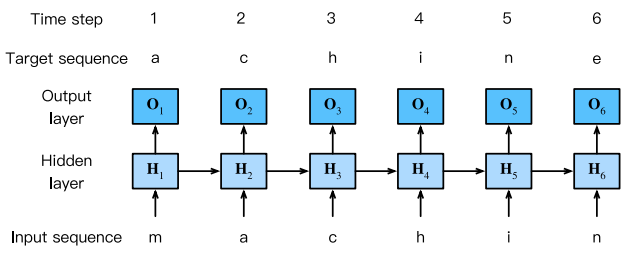